In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Define the different lists of genes

# Define the gene lists
true_answer = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "CDK1", "CDC25A", "E2F2", "E2F4_5", "ATR", "CHEK1", "GJA1", "GJD2", "TUBA", "SOS", "TUBB"]
claude_genes = ["CDKN2A", "CDKN1B", "CDKN1A", "ATM", "DEC1", "TP53", "ETS2", "ETS1/2", "IL6", "DEC1", "PAI-1", "DEC1", "LMNB1", "SO", "CCNA2"]
claude_instant_genes = ["CDKN2A", "TP53", "CDKN1A", "TGFB1", "CDK1", "RELA", "IGF1R", "IL1A", "IKBKB", "FOXO1", "CREB1", "MDM2", "PAI1", "IKBKB", "MDM2"]
cohere_genes = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "CDK4", "COX4II", "MMP11", "FOXO4", "ATR", "RBL2", "TIMP", "MYC", "TUG", "SKP2", "RPL10A"]
chat_gpt3_genes = ["CDKN2A", "XYZ", "CDKN1A", "ATM", "CHEK2", "HMGA1", "RB1", "FOXO", "NRF2", "BCL2:", "AKT1", "HIF1A", "PTEN", "IL-6", "NFKB"]
chat_gpt4_genes = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "CDK4", "mTOR", "NF-κB", "NRF2", "ATR", "CHEK1", "p38", "CCNA2", "IL-6", "SIRT7", "CCNE2"]
claude2_pro_genes = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "TERT", "CDC2", "NF", "IL6/IL8", "ATR", "CHEK1", "RB1", "ETSI", "TP53", "PTEN", "PML"]
palm_2_genes = ["CDKN2A", "CDKN2B", "CDKN1A", "P53", "CDK1", "P16INK", "SODI", "BCL", "FOXO3A", "NRF2", "Mkk9", "AKT2", "DDB2", "E2F6", "FAS"]
bard_genes = ["CDKN2A", "CDKN2B", "CDKN1A", "AM", "CDK1", "mTOR", "NF-κB", "P16INK", "ATR", "CHEK1", "RB1", "ETSI", "TP53", "PTEN", "PML"]
codellama_34instruct_genes = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "TERT", "CDC2", "NF", "IL6/IL8", "p38", "CCNA2", "IL-6", "SIRT7", "CCNE2", "p38", "CCNA2"]
wizardlm_70b_genes = ["CDK", "CDKN2B", "abc", "ATM", "FOXO3A", "NRF2", "Mkk9", "FOXO3A", "ATR", "RB1", "ETSI", "TP53", "PTEN", "PML", "RB1"]
wizardlm_13b_genes = ["CDKN2A", "CDKN2B", "CDKN2A", "ATM", "CDK4", "mTOR", "NF-κB", "NRF2", "CDK4", "mTOR", "TIMP", "MYC", "TUG", "SKP2", "RPL10A"]
falcon_180b_chat_genes = ["CDKN2A", "CDKN1B", "CDKN1A", "ATM", "CDK4", "COX4II", "MMP11", "CDK4", "ATR", "BCL", "FOXO3A", "NRF2", "Mkk9", "AKT2", "DDB2"]
mistral_7b_instruct_genes = ["CDKN2A", "CDKN1B", "CDKN2A", "CDKN1B", "mTOR", "NF-κB", "P16INK", "ATR", "CHEK1", "RB1", "ETSI", "TP53", "PTEN", "PML", "mTOR"]
chatglm2_6b_genes = ["CDKN2A", "CHEK2", "HMGA1", "RB1", "FOXO", "NRF2", "BCL2:", "AKT1", "HIF1A", "PTEN", "IL-6", "NFKB", "CHEK2", "HMGA1", "RB1"]
vicuna_7b = ["CDKN2A", "CDKN2B", "CDKNA", "ATM", "COX4II", "MMP11", "CDK4", "MP11", "ATR", "BCL", "FOXO3A", "NRF2", "Mkk9", "BCL", "BCL"]
vicuna_33b = ["CDKN2A", "CDKN2B", "CDKNA", "AM", "CDK1", "NF-κB", "P16INK", "ATR", "CHEK1", "RB1", "ETSI", "TP53", "PTEN", "PML", "mTOR"]
vicuna_13b = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "CDK4", "mTOR", "NF-κB", "NRF2", "CDK4", "mTOR", "TIMP", "MYC", "TUG", "SKP2", "RPL10A"]
llama_2_70b = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "RELA", "IGF1R", "IL1A", "IKBKB", "FOXO1", "CREB1", "MDM2", "PAI1", "IKBKB", "MDM2", "RELA"]
llama_2_13b = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "mTOR", "NF-κB", "NRF2", "CDK4", "mTOR", "TIMP", "MYC", "TUG", "SKP2", "RPL10A", "mTOR"]
llama_2_7b = ["CDKN2A", "CDKN2B", "CDKN1A", "ATM", "IGF1R", "mTOR", "NF-κB", "NRF2", "CDK4", "mTOR", "TIMP", "MYC", "TUG", "SKP2", "RPL10A"]
qwen_14b = ["CDKN2A", "CHEK2", "HMGA1", "RB1", "FOXO", "NRF2", "BCL2:", "AKT1", "HIF1A", "PTEN", "IL-6", "NFKB", "CHEK2", "HMGA1", "RB1"]

# Convert the lists to sets for easy set operations




# Convert the lists to sets for easy set operations
# Convert the lists to sets for easy set operations
true_answer_set = set(true_answer)
claude_set = set(claude_genes)
claude_instant_set = set(claude_instant_genes)
cohere_set = set(cohere_genes)
chat_gpt3_set = set(chat_gpt3_genes)
chat_gpt4_set = set(chat_gpt4_genes)
claude2_pro_set = set(claude2_pro_genes)
palm_2_set = set(palm_2_genes)
bard_set = set(bard_genes)
codellama_34instruct_set = set(codellama_34instruct_genes)
wizardlm_70b_set = set(wizardlm_70b_genes)
wizardlm_13b_set = set(wizardlm_13b_genes)
falcon_180b_chat_set = set(falcon_180b_chat_genes)
mistral_7b_instruct_set = set(mistral_7b_instruct_genes)
chatglm2_6b_set = set(chatglm2_6b_genes)
vicuna_7b_set = set(vicuna_7b)
vicuna_33b_set = set(vicuna_33b)
vicuna_13b_set = set(vicuna_13b)
llama_2_70b_set = set(llama_2_70b)
llama_2_13b_set = set(llama_2_13b)
llama_2_7b_set = set(llama_2_7b)
qwen_14b_set = set(qwen_14b)



# Function to compare gene sets
def compare_sets(name, comparison_set, true_set):
    print(f"Intersection with {name} ({len(true_set.intersection(comparison_set))} genes):", true_set.intersection(comparison_set))
    print(f"Additional in {name} ({len(comparison_set.difference(true_set))} genes):", comparison_set.difference(true_set))
    print()

# Display the results
compare_sets("Claude", claude_set, true_answer_set)
compare_sets("Claude Instant", claude_instant_set, true_answer_set)
compare_sets("Cohere", cohere_set, true_answer_set)
compare_sets("Chat-GPT-3.5", chat_gpt3_set, true_answer_set)
compare_sets("Chat-GPT-4", chat_gpt4_set, true_answer_set)
compare_sets("Claude_2Pro", claude2_pro_set, true_answer_set)
compare_sets("Palm-2", palm_2_set, true_answer_set)
compare_sets("Bard", bard_set, true_answer_set)
compare_sets("Codellama-34instruct", codellama_34instruct_set, true_answer_set)
compare_sets("wizardlm-70b", wizardlm_70b_set, true_answer_set)
compare_sets("wizardlm-13b", wizardlm_13b_set, true_answer_set)
compare_sets("falcon-180b-chat", falcon_180b_chat_set, true_answer_set)
compare_sets("mistral-7b-instruct", mistral_7b_instruct_set, true_answer_set)
compare_sets("chatglm2-6b", chatglm2_6b_set, true_answer_set)
compare_sets("vicuna_7b", vicuna_7b_set, true_answer_set)
compare_sets("vicuna_33b", vicuna_33b_set, true_answer_set)
compare_sets("vicuna_13b", vicuna_13b_set, true_answer_set)
compare_sets("llama_2_70b", llama_2_70b_set, true_answer_set)
compare_sets("llama_2_13b", llama_2_13b_set, true_answer_set)
compare_sets("llama_2_7b", llama_2_7b_set, true_answer_set)
compare_sets("qwen_14b", qwen_14b_set, true_answer_set)


Intersection with Claude (3 genes): {'ATM', 'CDKN1A', 'CDKN2A'}
Additional in Claude (10 genes): {'LMNB1', 'SO', 'IL6', 'DEC1', 'ETS2', 'PAI-1', 'CCNA2', 'TP53', 'CDKN1B', 'ETS1/2'}

Intersection with Claude Instant (3 genes): {'CDKN1A', 'CDK1', 'CDKN2A'}
Additional in Claude Instant (10 genes): {'IGF1R', 'RELA', 'IKBKB', 'MDM2', 'IL1A', 'PAI1', 'CREB1', 'TGFB1', 'FOXO1', 'TP53'}

Intersection with Cohere (5 genes): {'ATM', 'CDKN1A', 'CDKN2A', 'CDKN2B', 'ATR'}
Additional in Cohere (10 genes): {'TIMP', 'FOXO4', 'COX4II', 'MMP11', 'MYC', 'RPL10A', 'RBL2', 'CDK4', 'SKP2', 'TUG'}

Intersection with Chat-GPT-3.5 (3 genes): {'ATM', 'CDKN1A', 'CDKN2A'}
Additional in Chat-GPT-3.5 (12 genes): {'HMGA1', 'PTEN', 'XYZ', 'AKT1', 'RB1', 'IL-6', 'BCL2:', 'CHEK2', 'NRF2', 'HIF1A', 'NFKB', 'FOXO'}

Intersection with Chat-GPT-4 (6 genes): {'CHEK1', 'ATM', 'CDKN1A', 'CDKN2A', 'CDKN2B', 'ATR'}
Additional in Chat-GPT-4 (9 genes): {'mTOR', 'CCNE2', 'SIRT7', 'CCNA2', 'NF-κB', 'IL-6', 'CDK4', 'p38', 'NRF2'}



In [ ]:
# Define the gene sets and true answer set

# ... (Previously defined gene sets)

# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# List of gene sets
gene_sets = [
    ("Claude", claude_set),
    ("Claude Instant", claude_instant_set),
    ("Cohere", cohere_set),
    ("Chat-GPT-3.5", chat_gpt3_set),
    ("Chat-GPT-4", chat_gpt4_set),
    ("Claude_2Pro", claude2_pro_set),
    ("Palm-2", palm_2_set),
    ("Bard", bard_set),
    ("Codellama-34instruct", codellama_34instruct_set),
    ("wizardlm-70b", wizardlm_70b_set),
    ("wizardlm-13b", wizardlm_13b_set),
    ("falcon-180b-chat", falcon_180b_chat_set),
    ("mistral-7b-instruct", mistral_7b_instruct_set),
    ("chatglm2-6b", chatglm2_6b_set),
    ("vicuna_7b", vicuna_7b_set),
    ("vicuna_33b", vicuna_33b_set),
    ("vicuna_13b", vicuna_13b_set),
    ("llama_2_70b", llama_2_70b_set),
    ("llama_2_13b", llama_2_13b_set),
    ("llama_2_7b", llama_2_7b_set),
    ("qwen_14b", qwen_14b_set)
]
# Calculate Jaccard similarities and build the table
table_data = []
for name, gene_set in gene_sets:
    similarity = jaccard_similarity(gene_set, true_answer_set)
    table_data.append([name, f"{similarity:.4f}"])  # Format to four decimal places

# Add the true answer set to the table
#table_data.append(["True Answer", "1.000"])  # True Answer has a similarity of 1.000

# Display the table
from tabulate import tabulate

table_headers = ["LLM Model", "Jaccard Similarity"]
table = tabulate(table_data, headers=table_headers, tablefmt="pretty")
print(table)


+----------------------+--------------------+
|      LLM Model       | Jaccard Similarity |
+----------------------+--------------------+
|        Claude        |       0.1200       |
|    Claude Instant    |       0.1200       |
|        Cohere        |       0.2000       |
|     Chat-GPT-3.5     |       0.1111       |
|      Chat-GPT-4      |       0.2500       |
|     Claude_2Pro      |       0.2500       |
|        Palm-2        |       0.1538       |
|         Bard         |       0.2500       |
| Codellama-34instruct |       0.1667       |
|     wizardlm-70b     |       0.1200       |
|     wizardlm-13b     |       0.1250       |
|   falcon-180b-chat   |       0.1600       |
| mistral-7b-instruct  |       0.1250       |
|     chatglm2-6b      |       0.0385       |
|      vicuna_7b       |       0.1667       |
|      vicuna_33b      |       0.2000       |
|      vicuna_13b      |       0.1667       |
|     llama_2_70b      |       0.1739       |
|     llama_2_13b      |       0.1

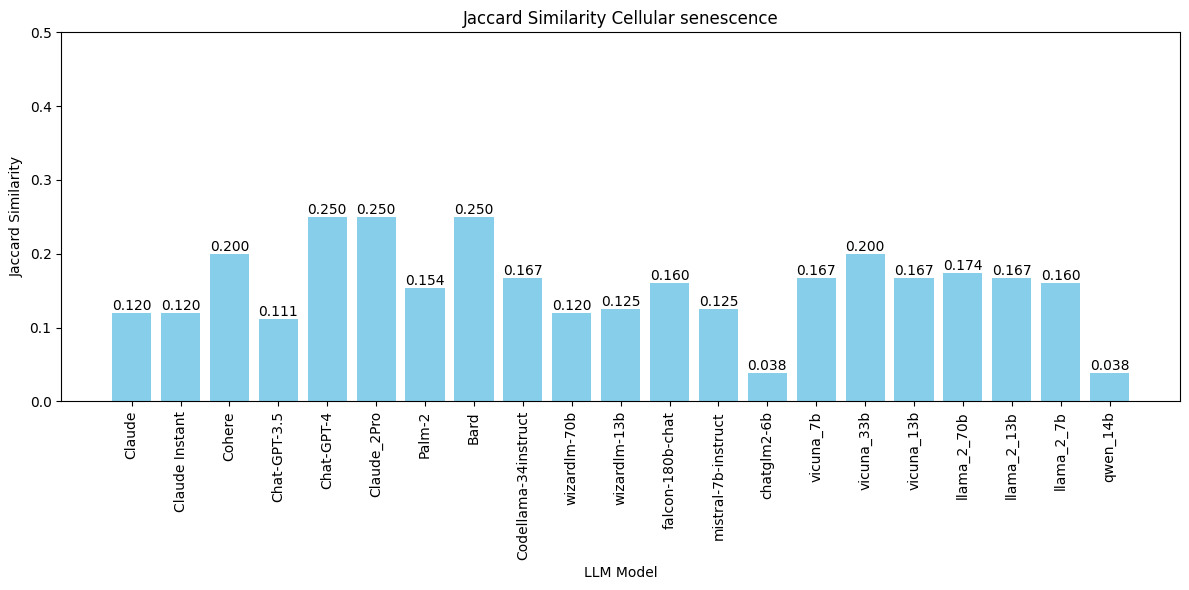

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart
gene_set_names = [name for name, _ in table_data]
similarities = [float(similarity) for _, similarity in table_data]

plt.figure(figsize=(12, 6))
plt.bar(gene_set_names, similarities, color='skyblue')
plt.xlabel('LLM Model')
plt.ylabel('Jaccard Similarity')
plt.title('Jaccard Similarity Cellular senescence')
plt.xticks(rotation=90)
plt.ylim(0, 0.5)  # Set the y-axis limit to range from 0 to 1

# Add labels with values above the bars
for i, similarity in enumerate(similarities):
    plt.text(i, similarity, f'{similarity:.3f}', ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()
